In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('./spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [63]:
print("# Shape of dataset (rows, columns): \n",df.shape)

# Shape of dataset (rows, columns): 
 (8000, 12)


In [64]:
print("# Check null fitur")
df.info()

# Check null fitur
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [65]:
print("# Ringkasan statistic dari kolom fitur yang berupa angka")
df.describe()

# Ringkasan statistic dari kolom fitur yang berupa angka


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [66]:
print("# Check jumlah data yang unik di setiap fitur")
df.nunique()

# Check jumlah data yang unik di setiap fitur


user_id                  8000
gender                      3
age                        44
country                     8
subscription_type           4
listening_time            290
songs_played_per_day       99
skip_rate                  61
device_type                 3
ads_listened_per_week      46
offline_listening           2
is_churned                  2
dtype: int64

In [67]:
# Convert categorical (string) fitur ke dalam angka (int64/float64)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['country'] = df['country'].map({'CA':0, 'DE':1, 'AU':2, 'US':3, 'UK':4, 'IN':5, 'FR':6, 'PK':7})
df['subscription_type'] = df['subscription_type'].map({'Free':0, 'Family':1, 'Premium':2, 'Student':3})
df['device_type'] = df['device_type'].map({'Desktop':0, 'Web':1, 'Mobile':2})

print("# Hasil setelah conversi categorical fitur kedalam angka")
df.head()

# Hasil setelah conversi categorical fitur kedalam angka


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,0,54,0,0,26,23,0.20,0,31,0,1
1,2,2,33,1,1,141,62,0.34,1,0,1,0
2,3,1,38,2,2,199,38,0.04,2,0,1,1
3,4,0,22,0,3,36,2,0.31,2,0,1,0
4,5,2,29,3,1,250,57,0.36,2,0,1,1


In [68]:
# Setelah mengkonvert categorical (string) column menjadi numerical (int64/float64) column dataset siap untuk ML model
# Output dari categorical:
# gender = "Female" -> 0 | "Male" -> 1 | "Other" -> 2
# country = "CA" -> 0 | "DE" -> 1 | "AU" -> 2 | "US" -> 3 | "UK" -> 4 | "IN" -> 5 | "FR" -> 6 | "PK" -> 7
# subscription_type = "Free" -> 0 | "Family" -> 1 | "Premium" -> 2 | "Student" -> 3
# device_type = "Desktop" -> 0 | "Web" -> 1 | "Mobile" -> 2
# Step ini penting agar dataset dapat digunakan langsung untuk training ML model yang kebanyakan menggnakan data numeric

# Show correlation matrix sebagai heatpmap


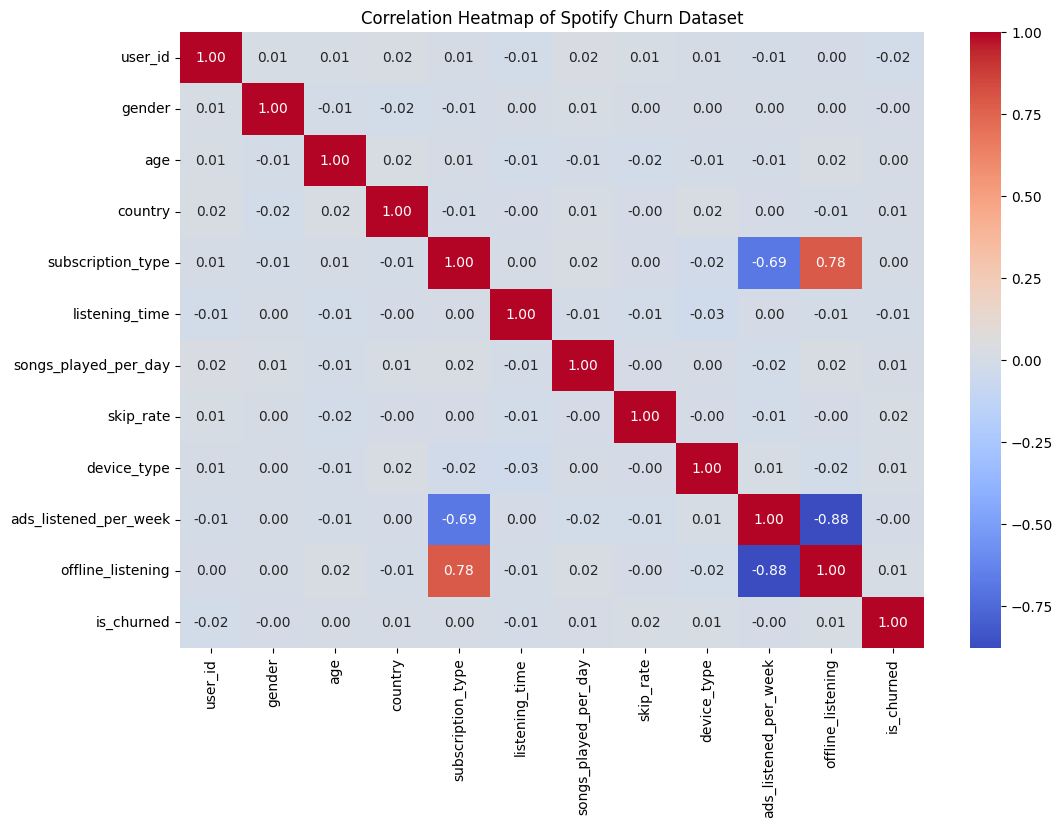

In [69]:
# Correlation matrix
correlation_matrix = df.corr()
print("# Show correlation matrix sebagai heatpmap")
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Spotify Churn Dataset")
plt.show()


In [ ]:
# Target column = is_churned
# Dari correlation matrix dan heatmap dapat diketahui bahwa semua fitur mempunyai korelasi yang lemah terhadap target
# Yang berarti bahwa tidak ada fitur independen yang bisa memprediksi target, 
# tetapi kombinasi dari beberapa fitur masih bisa berguna untuk memprediksi target dan berguan pada ML model
# nilai terbesar mendekati -1 berarti korelasi negatif terhadap target
# nilai terbesar mendekati 1 berarti korelasi positif terhadap target
# summary -> positive correlation = mendorong terjadinya churn, vice versa

In [71]:
# Drop fitur kurang berguna untuk displit dataset jadi features (X) dan target (y)
df = df.drop('user_id', axis=1)
X = df.drop('is_churned', axis=1)
y = df['is_churned']
print("# Shape of Features (X):", X.shape)
print("# Shape of Target (y):", y.shape)

# Shape of Features (X): (8000, 10)
# Shape of Target (y): (8000,)


In [72]:
# Features (X) berisi semua column kecuali user_id dan target (is_churned) yang akan digunakan model untuk prediksi churned
# Target (y) hanya berisi "is_churned"
# Output ini yang akan diprediksi oleh model seperti 1 = churned dan 0 = active

In [73]:
# Split dataset menjadi Training dan Testing set
# Training set -> untuk train ML model
# Testing set -> untuk mengevaluasi performa model
# Dengan ratio 75% data untuk training dan 25% data untuk testing (75:25)
# Juga random_state untuk reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("# Shape of X_train:", X_train.shape)
print("# Shape of X_test:", X_test.shape)
print("# Shape of y_train:", y_train.shape)
print("# Shape of y_test:", y_test.shape)

# Shape of X_train: (6000, 10)
# Shape of X_test: (2000, 10)
# Shape of y_train: (6000,)
# Shape of y_test: (2000,)


In [74]:
# X_train -> Shape: (6000, 10) berisi 6K samples dan 10 features untuk training model
# X_test -> Shape: (2000, 10) berisi 2K samples dan 10 features untuk testing/evaluasi model
# y_train -> Shape: (6000,) berisi 6K target label yang berpasangan dengan X_train
# y_test -> Shape: (2000,) berisi 2K target label untuk diuji akurasinya oleh model
# random_state digunakan untuk me-randomize dataset saat split dengan ratio 75:25 dengan 42 sebagai starting seed

In [75]:
# Scaling Fitur dengan StandardScaler
# Penting untuk menstandarkan fitur menjadi Mean = 0, dan STD = 1, agar tiap fitur berperan equally pada performa model

# Create a StandardScaler object
scaler = StandardScaler()

# Fit scaler pada training data dan transform keduanya training dan testing set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print("# First five records after scaling:\n", X_train_scaled[:5])
print("# X_test_caled data:\n",X_test_scaled[:5])

# X_test_caled data:
 [[-1.22006267 -1.31050341 -1.53097576  0.44375129  0.36686804 -0.98564936
   0.56672516  1.24327255 -0.50939798  0.57940308]
 [ 1.22822363 -1.15360074 -0.22108111  0.44375129  0.96281033 -1.40775394
   0.45209628 -1.20692791 -0.50939798  0.57940308]
 [ 1.22822363  1.356842   -0.22108111  1.34142752 -1.43287769  1.51180272
  -1.21002241  1.24327255 -0.50939798  0.57940308]
 [ 1.22822363  0.10162063  1.52544509 -0.45392495  0.64100149  1.68767962
   1.71301391  1.24327255 -0.50939798  0.57940308]
 [-1.22006267 -1.70276009  0.21555044  0.44375129 -0.43169464  0.21031361
  -1.72585234  0.01817232 -0.50939798  0.57940308]]


In [ ]:
print("# X_train_scaled data:\n",X_train_scaled[:5])

# X_train_caled data:
 [[ 0.00408048  1.19993933 -1.09434421  1.34142752  0.14040996  0.5972428
  -0.2929914   0.01817232 -0.50939798  0.57940308]
 [-1.22006267 -1.31050341 -0.22108111 -0.45392495 -0.32442503  1.61732886
  -1.61122347  1.24327255 -0.50939798  0.57940308]
 [ 0.00408048 -0.36908738 -1.53097576 -1.35160119  1.1892684   0.5972428
   1.36912728  1.24327255  1.99131645 -1.7259142 ]
 [ 1.22822363  0.2585233  -1.09434421  0.44375129 -1.43287769 -1.72433237
  -1.26733684  0.01817232 -0.50939798  0.57940308]
 [-1.22006267 -0.29063605 -1.09434421  1.34142752 -0.59855848 -1.23187703
   0.50941072 -1.20692791 -0.50939798  0.57940308]]


In [ ]:
# Hasil diatas adalah hasil dari perhitungan standard scaler menjadi niali z-score
# agar semua fitur berkontribusi sama (equally) pada saat model training
# Setiap array-nya adalah tiap row pada dataset, dengan kolom juga seperti pada dataset yang dipisahkan dengan "whitespace"